In [1]:
import pickle
import utils
import params
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ficheros = utils.getFiles(params.VAL_IMAGES_PATH)

In [4]:
with open(params.CNN_VAL_INDEX,'rb') as handle:
    tree = pickle.load(handle)

In [26]:
with open(r'C:\Users\bldr1\Desktop\TESIS\MODEL\cnn_mlp.pickle','rb') as handle:
    mlp = pickle.load(handle)

In [6]:
with open(params.BIGRAM_MODEL,'rb') as handle:
    bigram_model = pickle.load(handle)

In [7]:
with open(params.TF_IDF_MODEL,'rb') as handle:
    tf_idf = pickle.load(handle)

In [27]:
query = 'bus'
sparse = bigram_model.transform([query])

In [28]:
descriptor = tf_idf.transform(sparse)

C:\Users\bldr1\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1059: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [29]:
descriptor2img = mlp.predict(descriptor)

In [30]:
descriptor2img.shape

(1, 128)

In [31]:
dist, idxs = tree.query(descriptor2img, k = 5)

In [32]:
dist

array([[0.68005864, 0.6965348 , 0.70225484, 0.70507856, 0.71760621]])

In [33]:
idxs

array([[10094, 16486, 13595,  3659,  6606]], dtype=int64)

In [34]:
selected_images = np.asarray(ficheros)[idxs]

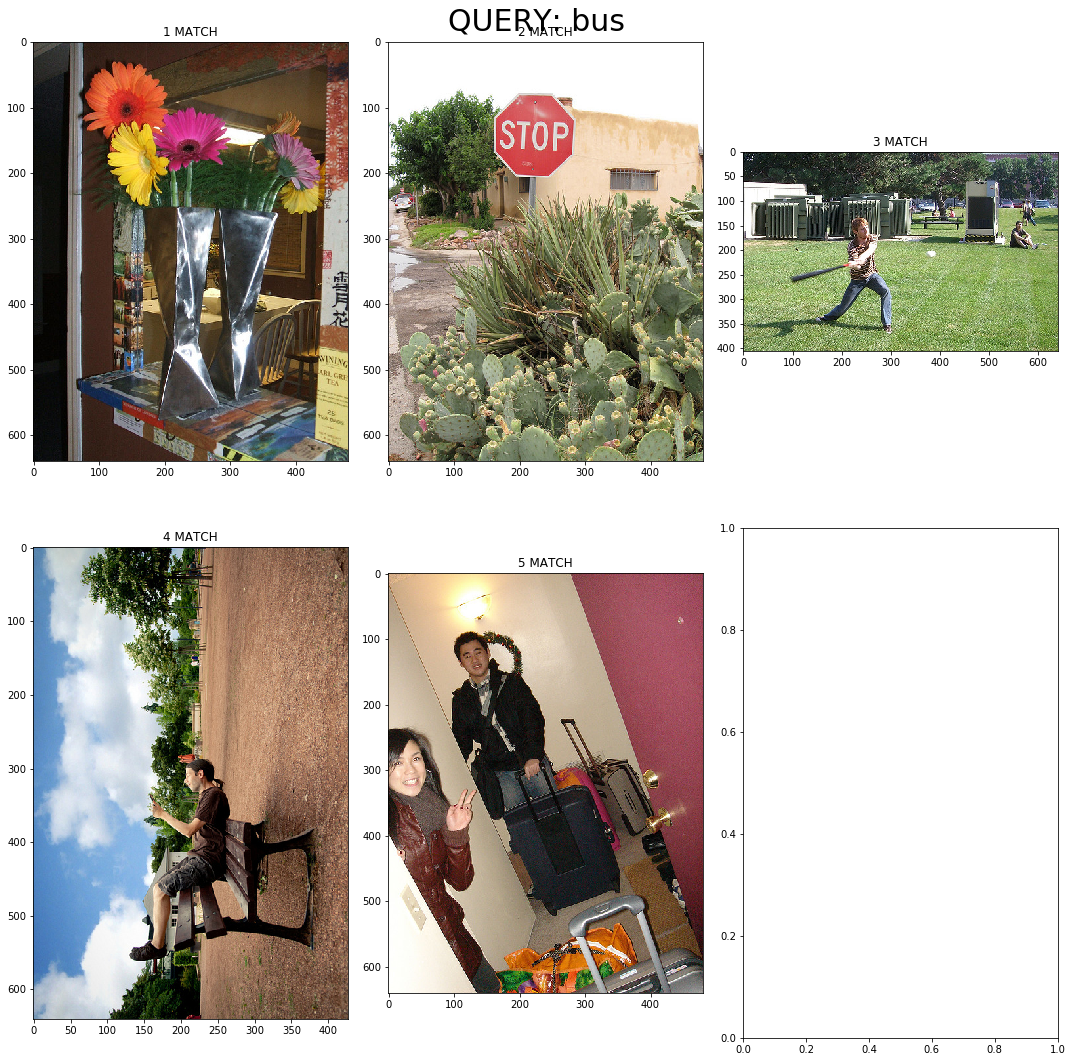

In [35]:
f, ax = plt.subplots(int(5/3) + 1, 3,figsize = (15,15))
f.suptitle('QUERY: {}'.format(query), fontsize=30)

row = 0
column = 0
for i, image in enumerate(selected_images[0]):
    img = plt.imread(image)
    ax[row,column].imshow(img)
    ax[row,column].set_title(str(i+1)+ ' MATCH')
    if column == 2:
        row = row + 1
        column = 0
    else:
        column = column + 1

plt.tight_layout()
plt.show()